# Perfil de atendimento Odontológico nas Unidades Municipais de Saúde de Curitiba

**Pedro H. M. Tashima**

**2025-10-08**

In [94]:
import pandas as pd
from IPython.display import Markdown, display

df = pd.read_csv('./2025-07-06_Sistema_E-Saude_Odontologico_-_Base_de_Dados.csv', sep=';', encoding='latin-1')

## Introdução

O conjunto de dados "[Sistema E-Saude - Perfil de atendimento Odontológico nas Unidades Municipais de Saúde de Curitiba](https://dadosabertos.curitiba.pr.gov.br/conjuntodado/detalhe?chave=afa9c22d-4fd7-407a-857b-1ab29fc305a3)" reúne informações sobre atendimentos realizados por profissionais de odontologia em unidades de saúde. Esses dados mostram o perfil dos usuários atendidos, com informações demográficas, socioeconômicas e de saúde, além de detalhes sobre os procedimentos realizados.



## Limpeza

In [95]:
print("O conjunto de dados, antes da limpeza, possui", df.shape[0], "linhas.")

O conjunto de dados, antes da limpeza, possui 326170 linhas.


Pela natureza do sistema de coleta de dados, algumas colunas não são válidas ou utilizadas para atendimentos odontológicos. Outras, são raramente preenchidas. Por esses motivos, colunas totalmente vazias ou com poucos valores não serão utilizadas.

In [96]:
display(Markdown("**Tabela 1: Valores nulos por coluna**"))
display(df.isnull().sum().to_frame(name='Número de valores nulos').sort_values(by='Número de valores nulos', ascending=False))

**Tabela 1: Valores nulos por coluna**

,Número de valores nulos
Estabelecimento Solicitante,326170
Código do CID,326170
Estabelecimento Destino,326170
Data do Internamento,326170
Descrição do CID,326170
CID do Internamento,326170
Área de Atuação,309099
Grupo Comunitário,60310
Fezes/Urina,59578
Meio de Comunicacao,58812


In [97]:
df = df.loc[:, ['Data do Atendimento', 'Data de Nascimento', 'Sexo', 'Descrição do Procedimento', 'Descrição do CBO']].copy()

df = df.copy()

# Remove linhas com NaN
df = df.dropna()

# Transformar em objetos datetime
df['Data do Atendimento'] = pd.to_datetime(df['Data do Atendimento'], format='%d/%m/%Y %H:%M:%S')
df['Data de Nascimento'] = pd.to_datetime(df['Data de Nascimento'], format='%d/%m/%Y %H:%M:%S')
df['Idade'] = (df['Data do Atendimento'] - df['Data de Nascimento']).dt.days // 365

Apenas as colunas consideradas válidas para a análise foram mantidas e uma coluna adicional foi criada para representar a idade do paciente (Tabela 2).

**Tabela 2: Colunas mantidas após limpeza**

In [106]:

display(Markdown("**Tabela 2: Descrição das colunas utilizadas**"))
df_colunas_descricao = pd.DataFrame({
  'Coluna': df.columns,
  'Descrição': [
    'Data e hora do atendimento odontológico',
    'Data de nascimento do paciente',
    'Sexo do paciente',
    'Descrição do procedimento realizado',
    'Descrição da ocupação do profissional (CBO)',
    'Idade do paciente no momento do atendimento'
  ]
})
display(df_colunas_descricao.style.hide(axis="index"))


**Tabela 2: Descrição das colunas utilizadas**

Coluna,Descrição
Data do Atendimento,Data e hora do atendimento odontológico
Data de Nascimento,Data de nascimento do paciente
Sexo,Sexo do paciente
Descrição do Procedimento,Descrição do procedimento realizado
Descrição do CBO,Descrição da ocupação do profissional (CBO)
Idade,Idade do paciente no momento do atendimento


## Análise Exploratória dos Dados

In [98]:
std_idade = df['Idade'].std()
median_idade = df['Idade'].median()

display(Markdown(f"O desvio padrão da idade dos pacientes é de {std_idade:.2f} anos. A maior parte dos pacientes tem entre 0 e 60 anos, com uma diminuição gradual após os 60 anos (Gráfico 1)."))
display(Markdown(f"A mediana da idade dos pacientes é de {median_idade} anos, indicando que metade dos pacientes tem até essa idade, porém, com uma queda nos atendimentos em pacientes próximos dos 20 anos (Gráfico 2)."))

O desvio padrão da idade dos pacientes é de 20.87 anos. A maior parte dos pacientes tem entre 0 e 60 anos, com uma diminuição gradual após os 60 anos (Gráfico 1).

A mediana da idade dos pacientes é de 35.0 anos, indicando que metade dos pacientes tem até essa idade, porém, com uma queda nos atendimentos em pacientes próximos dos 20 anos (Gráfico 2).

<Axes: title={'center': 'Gráfico 1: Distribuição de idade dos pacientes'}, xlabel='Idade', ylabel='Número de pacientes'>

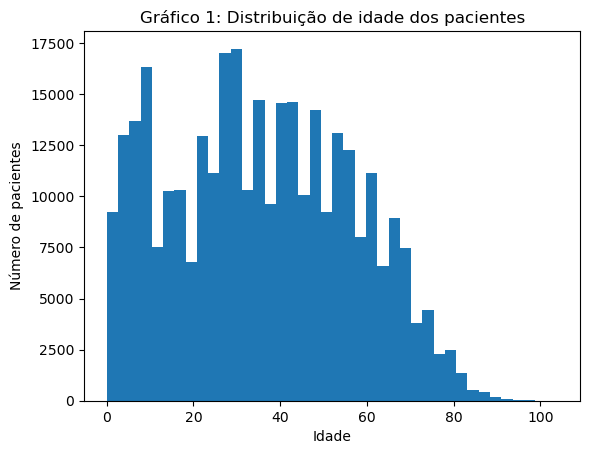

In [99]:
df['Idade'].plot(kind="hist",bins=40, title="Gráfico 1: Distribuição de idade dos pacientes", xlabel="Idade", ylabel="Número de pacientes")

A maior parte dos pacientes são adultos, sendo 75% com menos de 52 anos (Gráfico 2, Tabela 1).

<Axes: title={'center': 'Gráfico 2: Boxplot da idade dos pacientes'}, ylabel='Idade'>

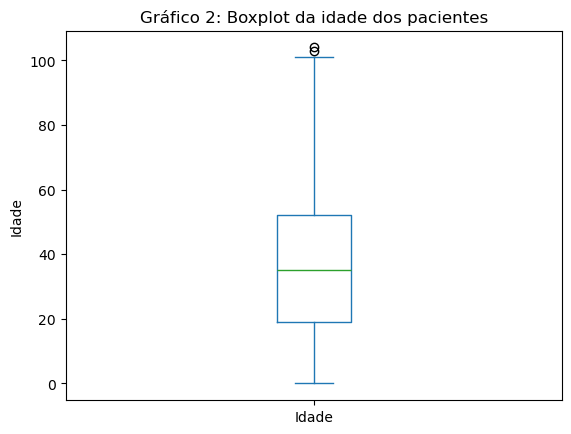

In [100]:

df['Idade'].plot(kind="box", title="Gráfico 2: Boxplot da idade dos pacientes", ylabel="Idade")

## Número de atêndimentos de homens e mulheres:

**Tabela 2: Percentual de atendimentos por sexo**

,Percentual
Sexo,
F,59.849465
M,40.150535


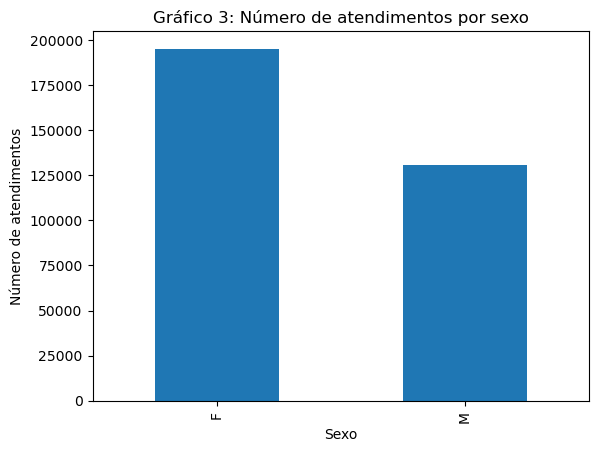

In [101]:
df.groupby('Sexo').size().plot(kind='bar', title="Gráfico 3: Número de atendimentos por sexo", xlabel="Sexo", ylabel="Número de atendimentos")

sexo_counts = df['Sexo'].value_counts(normalize=True) * 100
display(Markdown("**Tabela 2: Percentual de atendimentos por sexo**"))
display(sexo_counts.to_frame(name='Percentual'))

Quando separados por sexo, observa-se que a maioria dos atendimentos é realizada em mulheres (Tabela 2 e Gráfico 3).

**Tabela 3: Percentual de atendimentos dos 5 procedimentos mais comuns**

,Percentual
Descrição do Procedimento,
PRIMEIRA CONSULTA ODONTOLOGICA PROGRAMATICA,17.245915
ORIENTACAO DE HIGIENE BUCAL,8.375080
PROFILAXIA / REMOCAO DA PLACA BACTERIANA,7.210657
SELAMENTO PROVISORIO DE CAVIDADE DENTARIA,7.126958
CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA ATENCAO PRIMARIA (EXCETO MEDICO),6.570807


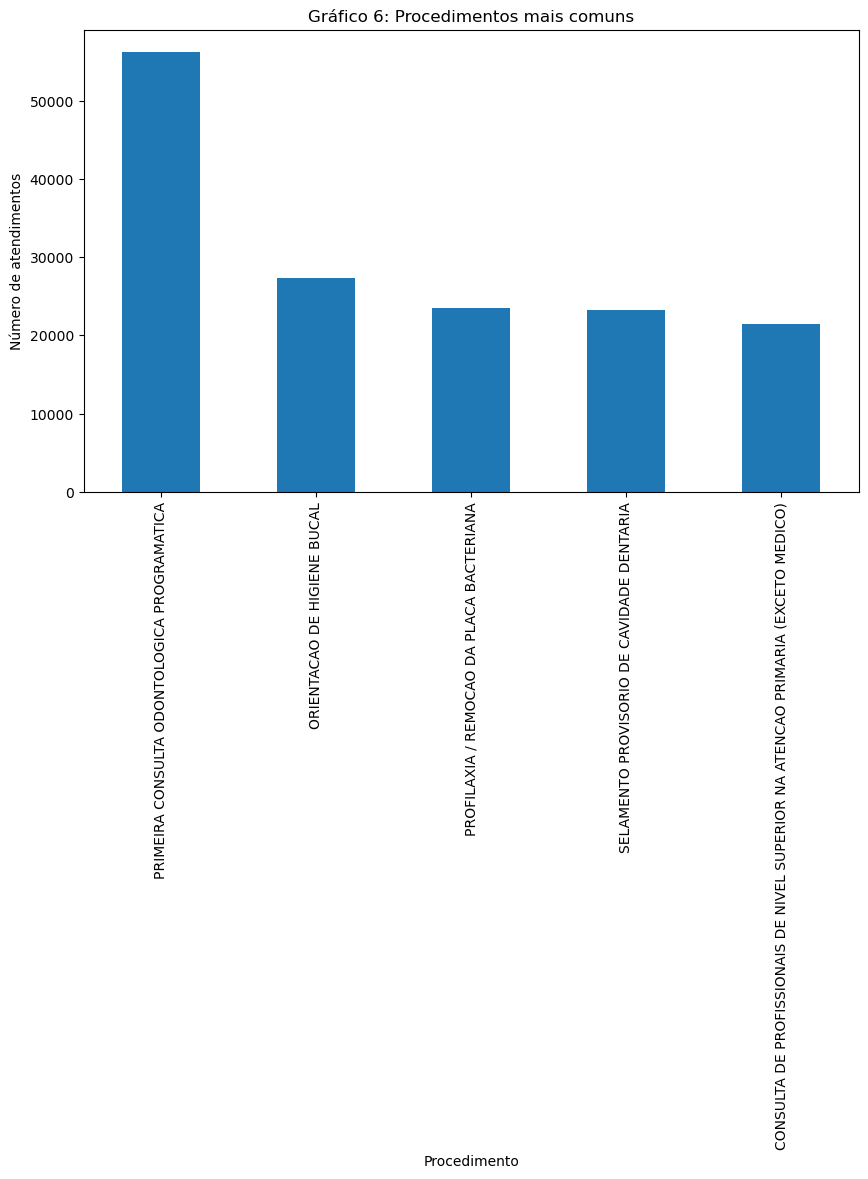

In [102]:
top_five_procedimentos = df.groupby('Descrição do Procedimento').size().sort_values(ascending=False).head(5)
top_five_procedimentos.plot(kind='bar', figsize=(10, 6), title="Gráfico 6: Procedimentos mais comuns", xlabel="Procedimento", ylabel="Número de atendimentos")

display(Markdown("**Tabela 3: Percentual de atendimentos dos 5 procedimentos mais comuns**"))
top_five_procedimentos_percentual = (top_five_procedimentos / df.shape[0]) * 100
display(top_five_procedimentos_percentual.to_frame(name='Percentual'))

A primeira consulta odontológica é o procedimento mais comum, seguido por orientação de higiene bucal e profilaxia (Gráfico 6 e Tabela 3).

In [103]:
from scipy.stats import anderson

result = anderson(df['Idade'].dropna())
df_anderson = pd.DataFrame({
  'Estatística': [result.statistic],
  'Valores críticos': [result.critical_values],
  'Níveis de significância': [result.significance_level]
})
display(Markdown("**Tabela 4: Teste de Anderson-Darling para normalidade da idade dos pacientes**"))
display(df_anderson)

**Tabela 4: Teste de Anderson-Darling para normalidade da idade dos pacientes**

,Estatística,Valores críticos,Níveis de significância
0,1947.662316,"[0.576, 0.656, 0.787, 0.918, 1.092]","[15.0, 10.0, 5.0, 2.5, 1.0]"


A distribuição da idade dos pacientes não tem muitos outliers (Gráfico 2), porém, não segue uma distribuição normal, conforme o teste de Anderson-Darling (Tabela 4).

### 1. Existe diferença entre o sexo dos pacientes de acordo com a idade?

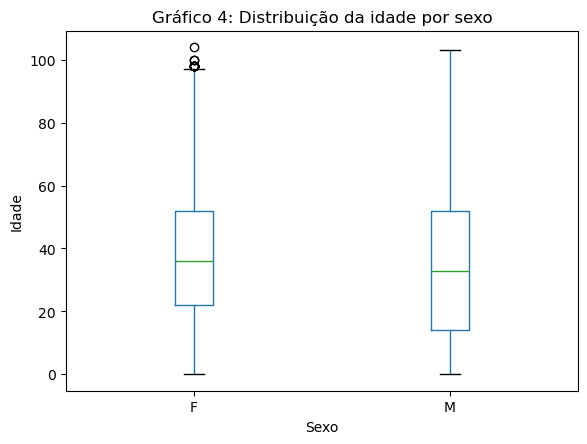

**Tabela 5: Média, mediana e n de idade por sexo**

,mean,median,count
Sexo,,,
F,36.574476,36.0,195211
M,34.398667,33.0,130959


**Tabela 6: Teste de Mann-Whitney U (Wilcoxon) para idade por sexo**

,Estatística,p-valor
0,1.359525e+10,7.074768e-209


In [104]:

import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Boxplot da idade por sexo
df.boxplot(column='Idade', by='Sexo', grid=False)
plt.title("Gráfico 4: Distribuição da idade por sexo")
plt.suptitle("")
plt.xlabel("Sexo")
plt.ylabel("Idade")
plt.show()

# Tabela de médias e medianas por sexo
media_medianas = df.groupby('Sexo')['Idade'].agg(['mean', 'median', 'count'])
display(Markdown("**Tabela 5: Média, mediana e n de idade por sexo**"))
display(media_medianas)

# Teste de Wilcoxon (Mann-Whitney U)
idades_f = df[df['Sexo'] == 'F']['Idade']
idades_m = df[df['Sexo'] == 'M']['Idade']
stat, p = mannwhitneyu(idades_f, idades_m, alternative='two-sided')
# Exibir resultado do teste como tabela
resultado_mannwhitney = pd.DataFrame({
  'Estatística': [stat],
  'p-valor': [p]
})
display(Markdown("**Tabela 6: Teste de Mann-Whitney U (Wilcoxon) para idade por sexo**"))
display(resultado_mannwhitney)

1. Existe diferença entre o sexo dos pacientes de acordo com a idade?
2. Existe diferença na idade do paciente de acordo com o procedimento realizado?
3. Os procedimentos variam de acordo com o sexo do paciente?
4. Existe correlação entre a descrição da ocupação do profissional e o procedimento realizado?